Epoch 1/5


C:\Users\sanje\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\sanje\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1421s 755ms/step - accuracy: 0.8862 - loss: 0.3563 - val_accuracy: 0.9892 - val_loss: 0.0470 - learning_rate: 1.0000e-04
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1418s 756ms/step - accuracy: 0.9847 - loss: 0.0716 - val_accuracy: 0.9906 - val_loss: 0.0431 - learning_rate: 1.0000e-04
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1342s 716ms/step - accuracy: 0.9882 - loss: 0.0584 - val_accuracy: 0.9929 - val_loss: 0.0375 - learning_rate: 1.0000e-04
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1401s 747ms/step - accuracy: 0.9896 - loss: 0.0514 - val_accuracy: 0.9885 - val_loss: 0.0566 - learning_rate: 1.0000e-04
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1402s 748ms/step - accuracy: 0.9910 - loss: 0.0459 - val_accuracy: 0.9937 - val_loss: 0.0340 - learning_rate: 1.0000e-04


Model saved.
313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 154ms/step - accuracy: 0.9922 - loss: 0.0393
Test loss: 0.03397047519683838
Test accuracy: 0.9937000274658203
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 293s 156ms/step - accuracy: 0.9951 - loss: 0.0244
Train loss: 0.026001062244176865
Train accuracy: 0.9947666525840759


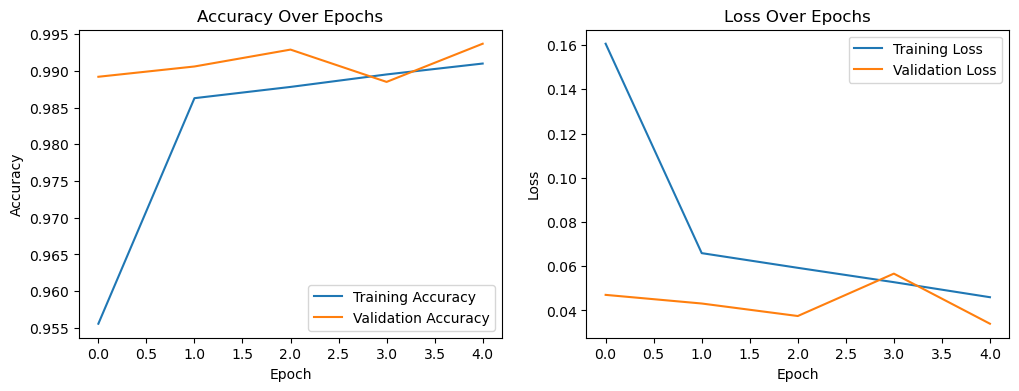

In [ ]:
# =============================================================================
# Author: Deepthi Kuttichiara and Pubudu Sanjeewani Thihagoda Gamage
# Date: 20-08-2024
# Title: A Novel Non-Iterative Training Method for CNN Classifiers Using Gram-Schmidt Process
# License: MIT License
# =============================================================================

# Import necessary TensorFlow/Keras modules and other dependencies for model building, training, and visualization
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.data import Dataset
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, DenseNet121, DenseNet169
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

# Set random seed and hyperparameters to ensure reproducibility and define training setup
seed = 42
class_num = 10
epochs = 5  # Increase epochs for fine-tuning
optimizer = 'adam'

# Load the MNIST dataset containing 28x28 grayscale handwritten digit images
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape grayscale images to add a single channel (28x28x1) 
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Convert integer labels to one-hot encoded vectors 
y_train = to_categorical(y_train, class_num)
y_test = to_categorical(y_test, class_num)

# Define a function to resize MNIST images to 32x32 and convert them to RGB format (3 channels)
def change_size(image):
    img = array_to_img(image, scale=False) # Convert array to PIL Image
    img = img.resize((32, 32))             # Resize to 32x32
    img = img.convert(mode='RGB')          # Convert to RGB (3 channels)
    arr = img_to_array(img)                # Convert back to array
    return arr.astype(np.float64)

# Resize and convert all training images to RGB and store them in a new array
train_arr_32 = [change_size(img) for img in x_train]
train_arr_32 = np.array(train_arr_32)
train_arr_32.shape
train_arr_32_to_evaluate = (train_arr_32.astype('float32')) / 255 # Normalize for evaluation

# Resize and convert all test images to RGB and store them in a new array
test_arr_32 = [change_size(img) for img in x_test]
test_arr_32 = np.array(test_arr_32)
test_arr_32.shape

# Create an ImageDataGenerator instance for real-time data augmentation during training
image_gen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values
    zoom_range=0.1,         # Random zoom
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2. # Vertical shift
)

# Use the ImageDataGenerator to create a batch-wise data generator for training
train_generator = image_gen.flow(
    train_arr_32,  # Training image data
    y_train,       # Training labels
    batch_size=32, # Batch size
    seed=42        # Seed for reproducibility
)

# Normalize test data for validation (no augmentation)
test_arr_32 = (test_arr_32.astype('float32')) / 255

# Build a sequential CNN model using transfer learning from VGG16 (pretrained on ImageNet)
model = Sequential()

# Add custom dense layers on top of the base model for classification
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3)) # Choose one of the models: VGG19, ResNet50, DenseNet121, or DenseNet169
model.add(base_model)
model.add(Flatten())
model.add(Dense(4000,activation=('relu'),input_dim=512))
model.add(Dense(2000,activation=('relu'))) 
model.add(Dropout(.4))                             # Dropout to prevent overfitting
model.add(Dense(1000,activation=('relu'))) 
model.add(Dropout(.3)) 
model.add(Dense(500,activation=('relu')))
model.add(Dropout(.2))
model.add(Dense(class_num,activation=('softmax'))) # Output layer for classification

# Define a learning rate scheduler to reduce LR on plateau in validation loss
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Set random seed for reproducibility
np.random.seed(seed)

# Train the model using the training data generator and validate on test set
history = model.fit(
    train_generator,                       # Training data generator
    epochs=epochs,                         # Number of epochs
    callbacks=[lr_scheduler],              # Learning rate scheduler
    verbose=1,                             # Verbosity mode
    validation_data=(test_arr_32, y_test)  # Validation data
)

# Save the trained model to a file for future use
model.save('mnist_vgg16.h5')
print('Model saved.')

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_arr_32, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

# Evaluate the model on the training dataset
train_loss, train_acc = model.evaluate(train_arr_32_to_evaluate, y_train)
print(f'Train loss: {train_loss}')
print(f'Train accuracy: {train_acc}')

# Plot training and validation accuracy/loss over epochs for performance visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()